In [4]:
from hdimvis.data_fetchers.DataFetcher import DataFetcher
from hdimvis.metrics.distance_measures.euclidian_and_manhattan import manhattan,euclidean
from hdimvis.algorithms.spring_force_algos.chalmers96_algo.Chalmers96 import Chalmers96
from hdimvis.create_low_d_layout.LayoutCreation import LayoutCreation
from hdimvis.visualise_layouts_and_metrics.plot import show_layout, show_generation_metrics
from sklearn.decomposition import PCA
from time import perf_counter
import numpy as np
from pathlib import Path
from definitions import PROJECT_ROOT
import pickle
import matplotlib.pyplot as plt

In [20]:
output_dir= (Path(PROJECT_ROOT).joinpath(
    Path(f"experiments/confirming_time_complexity/out/"))).resolve().absolute()

path_to_pickle = (Path(output_dir).joinpath(Path(f"results_metro.pickle"))).resolve()
with open(path_to_pickle, 'rb') as file:
    results = pickle.load(file)
print(results)

[[[1.00000000e+02 1.00000000e+02 1.00000000e+02]
  [1.20000000e+03 1.20000000e+03 1.20000000e+03]
  [2.30000000e+03 2.30000000e+03 2.30000000e+03]
  [3.40000000e+03 3.40000000e+03 3.40000000e+03]
  [4.50000000e+03 4.50000000e+03 4.50000000e+03]
  [5.60000000e+03 5.60000000e+03 5.60000000e+03]
  [6.70000000e+03 6.70000000e+03 6.70000000e+03]
  [7.80000000e+03 7.80000000e+03 7.80000000e+03]
  [8.90000000e+03 8.90000000e+03 8.90000000e+03]
  [1.00000000e+04 1.00000000e+04 1.00000000e+04]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[1.11885140e+00 1.11707800e+00 1.12670530e+00]
  [1.63612097e+01 1.60471594e+01 1.65515348e+01]
  [3.29939504e+01 3.15541086e+01 3.36575641e+01]
  [4.84174518e+01 4.75228603e+01 4.77551225e+01]
  [6.41082568e+01 6.38379123e+01 6.34490278e+01]
  [8.23484562e+01 

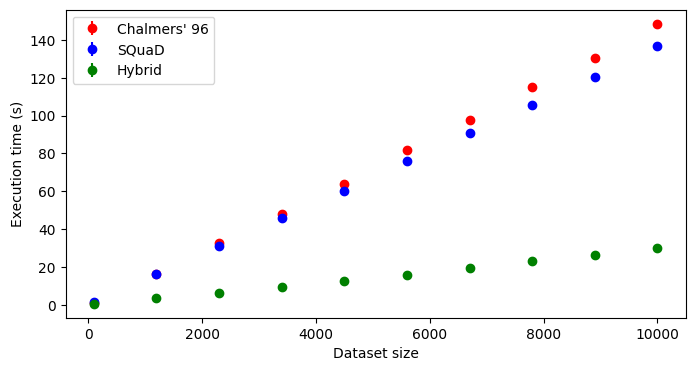

In [21]:
# 96 1
# sned 2
# hybrid 3
x = results[0,:10,0]
# index = 3
# data = results[index, 0:10,:]
# print(x)
# data[9,2] = np.mean(data[9,0:2])

colors = ['r', 'b', 'g']
labels = ["Chalmers' 96", "SQuaD", "Hybrid"]

fig, ax = plt.subplots()
for i,index in enumerate([1,2,3]):
    data = results[index, 0:10,:]

    # data[9,2] = np.mean(data[9,0:2])
    mean = np.mean(data, axis=1)
    upper_error = np.max(data,axis=1) - mean
    lower_error = mean - np.min(data,axis=1)
    ax.errorbar(x,mean, yerr=np.concatenate((upper_error[None,...],lower_error[None,...]), axis=0),
                fmt='o', c=colors[i], label= labels[i])

ax.set_ylabel("Execution time (s)")
ax.set_xlabel("Dataset size")
fig.set_size_inches(8,4)
plt.legend()
plt.show()